<a href="https://colab.research.google.com/github/Tagaingne/CAR/blob/master/Campagne_maketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Chargement du dataset

In [ ]:
df = pd.read_csv("/content/Dataset_Reponse_Marketing.csv")

Prétraitement des données

In [ ]:
df.head()

,Age,Sexe,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Reponse_campagne
0,22,Homme,40124,16.518974,9,1
1,32,Femme,26307,21.973535,8,1
2,28,Femme,30040,26.762915,9,1
3,16,Femme,15843,29.046008,9,0
4,45,Homme,20225,21.479944,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2400 non-null   int64  
 1   Sexe                  2400 non-null   object 
 2   Revenu_annuel         2400 non-null   int64  
 3   Temps_passe_sur_site  2400 non-null   float64
 4   Achats_en_ligne       2400 non-null   int64  
 5   Reponse_campagne      2400 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 112.6+ KB


In [ ]:
df.describe()

,Age,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Reponse_campagne
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,34.611250,26197.005000,22.073762,7.642083,0.526250
std,10.087287,7062.015627,3.993837,1.612471,0.499415
min,-1.000000,4422.000000,8.656394,2.000000,0.000000
25%,28.000000,21414.250000,19.381206,7.000000,0.000000
50%,35.000000,26222.000000,22.072839,8.000000,1.000000
75%,42.000000,30909.250000,24.798229,9.000000,1.000000
max,79.000000,50002.000000,37.769324,13.000000,1.000000


In [ ]:
df.shape

(2400, 6)

Visualization et Exploration des corrélations

Ici nous allons effectué l'encodage de la variable catégorielle ("Sexe") en valeurs numériques.

In [ ]:
df["Sexe"] = df["Sexe"].map({"Femme": 0, "Homme": 1})

In [ ]:
print(df.isnull().sum())

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


Distribution de l'âge

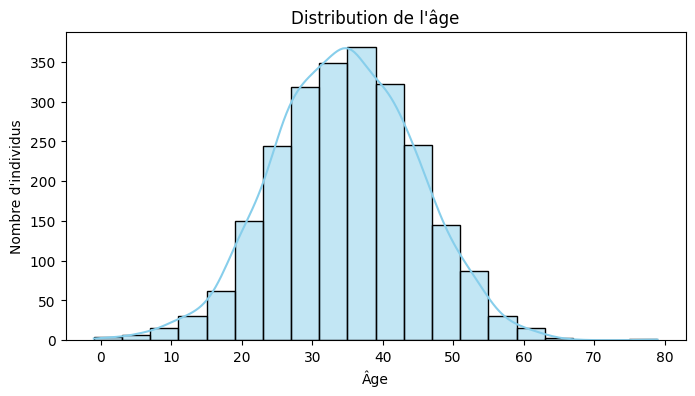

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], bins=20, kde=True, color='skyblue')
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'individus")
plt.show()


Sur la distribution de l'âgee, je constate que:
   La plupart des clients ont un âge compris entre 25 et 45 ans.
   Peu de clients ont moins de 20 ans ou plus de 60 ans.
   Le pic de la distribution est autour de 35 ans, ce qui indique que c’est l’âge le plus fréquent dans l'échantillon.
   La distribution est légèrement asymétrique à droite (légère queue vers les âges élevés), ce qui veut dire qu’il y a quelques clients plus âgés, mais en très faible proportion.

Distribution du revenu annuel


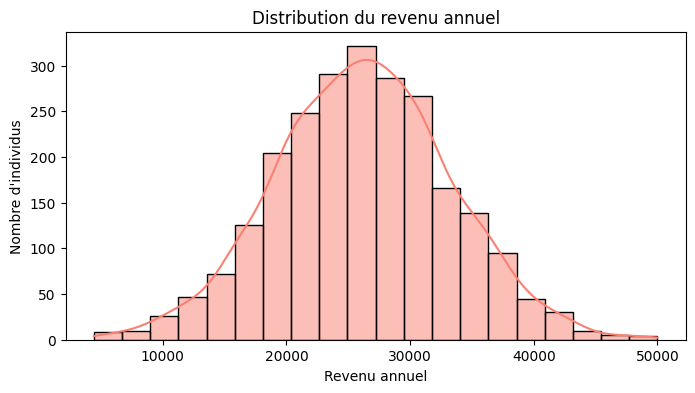

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["Revenu_annuel"], bins=20, kde=True, color='salmon')
plt.title("Distribution du revenu annuel")
plt.xlabel("Revenu annuel")
plt.ylabel("Nombre d'individus")
plt.show()

Répartition par sexe

<ipython-input-15-e068d717b197>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sexe", data=df, palette="pastel")


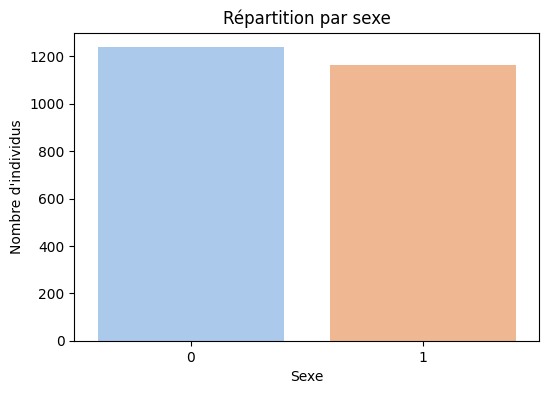

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sexe", data=df, palette="pastel")
plt.title("Répartition par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'individus")
plt.show()

Taux de réponse à la campagne

<ipython-input-16-4e53410ad42f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Reponse_campagne", data=df, palette="Set2")


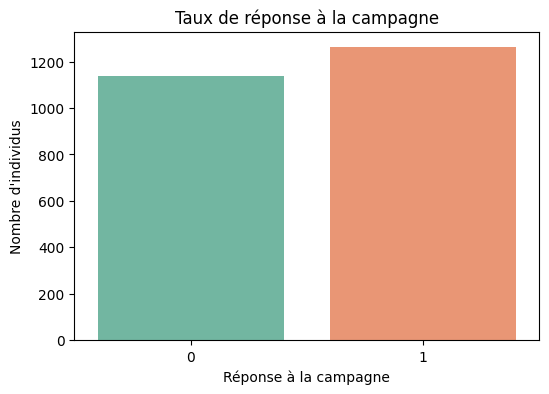

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Reponse_campagne", data=df, palette="Set2")
plt.title("Taux de réponse à la campagne")
plt.xlabel("Réponse à la campagne")
plt.ylabel("Nombre d'individus")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2400 non-null   int64  
 1   Sexe                  2400 non-null   int64  
 2   Revenu_annuel         2400 non-null   int64  
 3   Temps_passe_sur_site  2400 non-null   float64
 4   Achats_en_ligne       2400 non-null   int64  
 5   Reponse_campagne      2400 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 112.6 KB


Détection statistique des valeurs aberrantes (outliers) en utilisant la méthode de l'IQR(étendue interquartile)

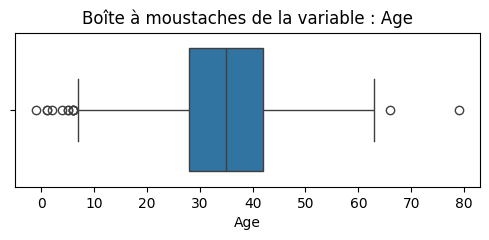

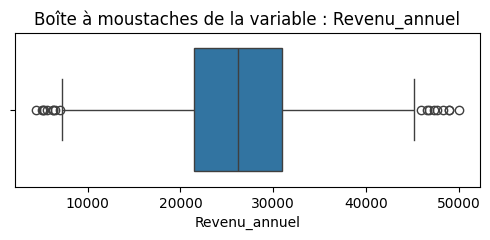

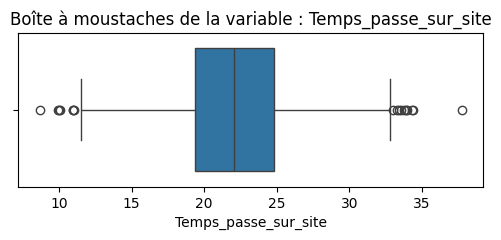

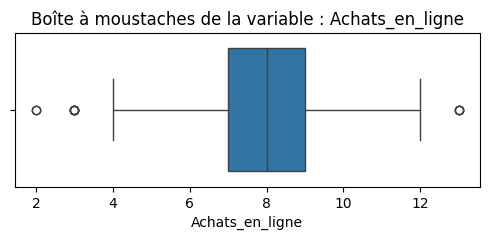

Nombre de valeurs aberrantes dans la colonne 'Age' : 13
Nombre de valeurs aberrantes dans la colonne 'Revenu_annuel' : 18
Nombre de valeurs aberrantes dans la colonne 'Temps_passe_sur_site' : 17
Nombre de valeurs aberrantes dans la colonne 'Achats_en_ligne' : 10


In [ ]:
# Colonnes numériques à analyser
colonnes_numeriques = ["Age", "Revenu_annuel", "Temps_passe_sur_site", "Achats_en_ligne"]

# Affichage des boxplots pour chaque variable numérique
for col in colonnes_numeriques:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boîte à moustaches de la variable : {col}")
    plt.xlabel(col)
    plt.show()

# Détection statistique des valeurs aberrantes avec la méthode de l'IQR
for col in colonnes_numeriques:
    Q1 = df[col].quantile(0.25)  # Premier quartile
    Q3 = df[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1                # Étendue interquartile
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Nombre de valeurs aberrantes dans la colonne '{col}' : {outliers.shape[0]}")


In [ ]:
# permet d’obtenir la liste de toutes les valeurs d’âge différentes présentes dans le jeu de données, sans doublons.

df['Age'].unique().tolist()


[22,
 32,
 28,
 16,
 45,
 46,
 43,
 40,
 41,
 53,
 35,
 38,
 25,
 39,
 37,
 27,
 20,
 31,
 49,
 23,
 51,
 54,
 42,
 29,
 33,
 26,
 36,
 47,
 34,
 30,
 17,
 44,
 55,
 18,
 56,
 13,
 52,
 24,
 50,
 15,
 12,
 58,
 48,
 19,
 21,
 1,
 57,
 59,
 11,
 2,
 6,
 10,
 14,
 66,
 61,
 63,
 -1,
 62,
 5,
 4,
 60,
 9,
 8,
 79,
 7]

On supprime les lignes avec un âge < 13 ans pour éviter de fausser l’analyse, car ce sont probablement des erreurs ou des profils non pertinents dans le cadre d’une campagne marketing ciblant des adultes ou jeunes adultes.

In [ ]:
#On supprime les lignes qui ont un age inf a 13 ans
nb_supprimes = df[df["Age"] < 13].shape[0]
df = df[df["Age"] >= 13]
print(f"Nombre de lignes supprimées : {nb_supprimes}")

Nombre de lignes supprimées : 40


In [ ]:
df.shape

(2360, 6)

In [ ]:
# suppression des lignes où le revenu est inférieur à 10000
nb_supprimes = df[df["Revenu_annuel"] < 10000].shape[0]
df = df[df["Revenu_annuel"] >= 10000]
print(f"Nombre de lignes supprimées : {nb_supprimes}")

Nombre de lignes supprimées : 27


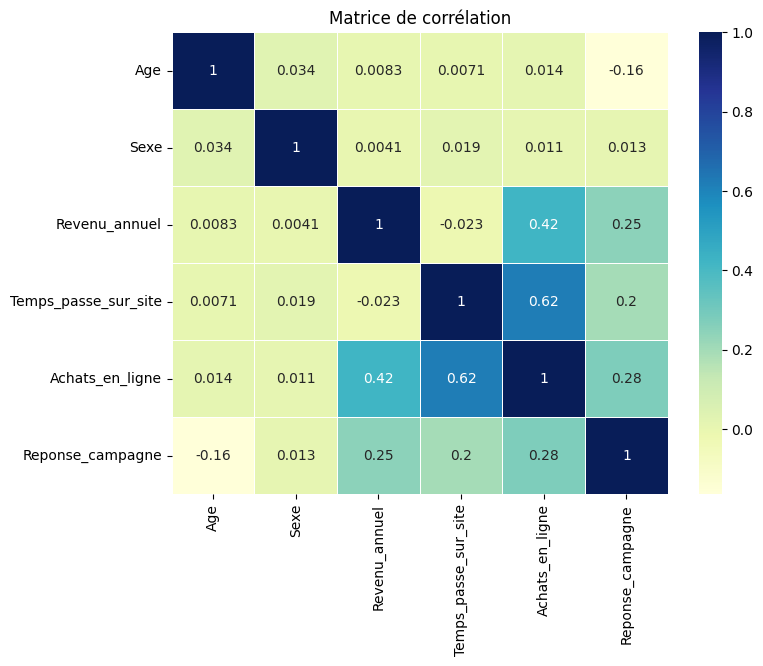

In [ ]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

L’analyse des corrélations entre les variables explicatives met en évidence plusieurs relations significatives. On observe tout d’abord une forte corrélation positive (0.62) entre le temps passé sur le site et le nombre d’achats en ligne. Cela suggère que les utilisateurs qui passent davantage de temps sur le site ont tendance à effectuer plus d’achats, ce qui est cohérent avec un comportement d’achat en ligne.

Une autre corrélation notable concerne le revenu annuel et les achats en ligne, avec un coefficient de 0.42. Cette relation montre qu’un revenu plus élevé est globalement associé à une plus grande propension à acheter en ligne, ce qui est également intuitif.

Ces corrélations indiquent qu’il existe une certaine redondance entre les variables explicatives. En d’autres termes, certaines variables apportent des informations similaires, ce qui peut introduire du bruit ou une complexité inutile dans les modèles. Cela justifie pleinement le recours à une méthode de réduction de dimensionnalité, comme la PCA (Analyse en Composantes Principales), afin de condenser l'information tout en conservant l’essentiel de la variance présente dans les données.

standardisation

In [ ]:
# Sélection des colonnes numériques
colonnes = ["Age", "Revenu_annuel", "Temps_passe_sur_site", "Achats_en_ligne"]
X = df[colonnes]

# Standardisation
scaler = StandardScaler()
X_standardise = scaler.fit_transform(X)

# Création du DataFrame standardisé
df_standardise = pd.DataFrame(X_standardise, columns=colonnes)
# Instanciation de la PCA (on garde toutes les composantes)
pca = PCA()
X_pca = pca.fit_transform(X)
# Création d'un DataFrame pour les composantes principales
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

In [ ]:
X = df_standardise[["Age", "Revenu_annuel", "Temps_passe_sur_site", "Achats_en_ligne"]]
y = df["Reponse_campagne"]  # adapte selon ta cible

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pipeline PCA + modèle
pipe = Pipeline([
    ("pca", PCA()),
    ("clf", LogisticRegression())
])

# GridSearch sur le nombre de composantes principales
param_grid = {
    "pca__n_components": [1, 2, 3, 4]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleur nombre de composantes principales :", grid.best_params_["pca__n_components"])
print("Score sur le test set :", grid.score(X_test, y_test))

Meilleur nombre de composantes principales : 4
Score sur le test set : 0.6188436830835118


 Je retiend que:  ?

    PCA est utile pour réduire la dimension, surtout si certaines variables sont redondantes.

    Ici, la réduction n'améliore pas la performance, donc garder les 4 composantes est optimal.

    Un score de 62% n’est pas excellent → il faudra peut-être :Tester d’autres modèles

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
score = tree_clf.score(X_test, y_test)
print(f"Score de l'arbre de décision sur le test set : {score:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree_clf.predict(X_test)
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
print(f"Score moyen en validation croisée : {cv_scores.mean():.4f}")





Score de l'arbre de décision sur le test set : 0.5824
Matrice de confusion :
[[135  86]
 [109 137]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       221
           1       0.61      0.56      0.58       246

    accuracy                           0.58       467
   macro avg       0.58      0.58      0.58       467
weighted avg       0.59      0.58      0.58       467

Score moyen en validation croisée : 0.6104


Comparaison avec la régression logistique + PCA

    Régression logistique (score test set) : 0.6188

    Arbre de décision (score test set) : 0.5824

    Conclusion : La régression logistique avec PCA fait légèrement mieux ici, même si les scores sont proches.

 Testons l'arbre de décision avec GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définition de l'arbre
dt = DecisionTreeClassifier(random_state=42)

# Grille des hyperparamètres à tester
param_grid = {
    "max_depth": [3, 5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# GridSearch avec validation croisée (cv=5)
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print(" Meilleurs paramètres :", grid_dt.best_params_)

# Évaluation sur le test set
best_dt = grid_dt.best_estimator_
score_test = best_dt.score(X_test, y_test)
print(" Score sur le test set :", score_test)

# Matrice de confusion et rapport de classification
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_dt.predict(X_test)

print(" Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\n Rapport de classification :\n", classification_report(y_test, y_pred))


 Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
 Score sur le test set : 0.6316916488222698
 Matrice de confusion :
 [[152  69]
 [103 143]]

 Rapport de classification :
               precision    recall  f1-score   support

           0       0.60      0.69      0.64       221
           1       0.67      0.58      0.62       246

    accuracy                           0.63       467
   macro avg       0.64      0.63      0.63       467
weighted avg       0.64      0.63      0.63       467



Interprétation

    L'arbre optimisé dépasse les performances de la régression logistique dans ce cas.

    Il sacrifie un peu de rappel sur les répondants (classe 1) mais améliore la précision globale.

    Cela peut être utile dans un contexte marketing : mieux vaut éviter de cibler des gens qui ne répondront jamais.

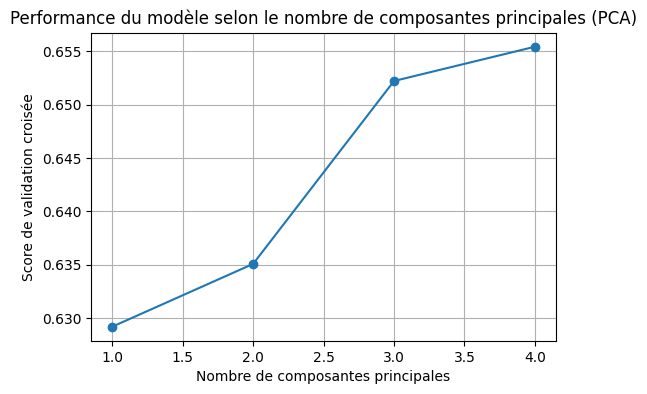

In [ ]:
results = grid.cv_results_
n_components = param_grid["pca__n_components"]
mean_test_scores = [results["mean_test_score"][i] for i in range(len(n_components))]

# Plot de la performance en fonction du nombre de composantes principales
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(n_components, mean_test_scores, marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Score de validation croisée")
plt.title("Performance du modèle selon le nombre de composantes principales (PCA)")
plt.grid(True)
plt.show()


Interprétation :

    Le score augmente avec le nombre de composantes utilisées.

    Meilleure performance atteinte avec 4 composantes, mais la différence entre 3 et 4 est minime.

Conclusion : Le meilleur compromis entre performance et simplicité est atteint à 3 composantes, car la 4e n'améliore que très légèrement les résultats.

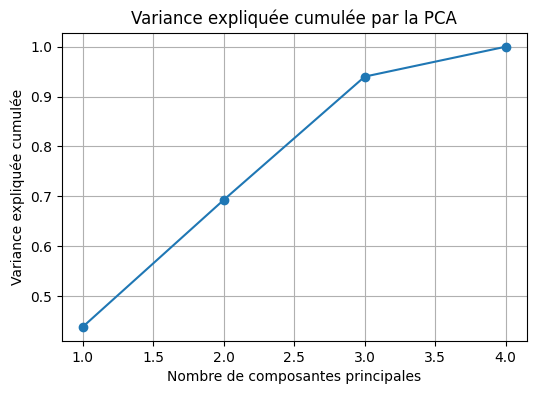

In [ ]:
pca = grid.best_estimator_.named_steps["pca"]
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée cumulée par la PCA")
plt.grid(True)
plt.show()

Interprétation :

    Avec 2 composantes, on atteint déjà ~70 % de la variance.

    Avec 3 composantes, on est à ~93 %.

    4 composantes permettent d’expliquer presque 100 %.

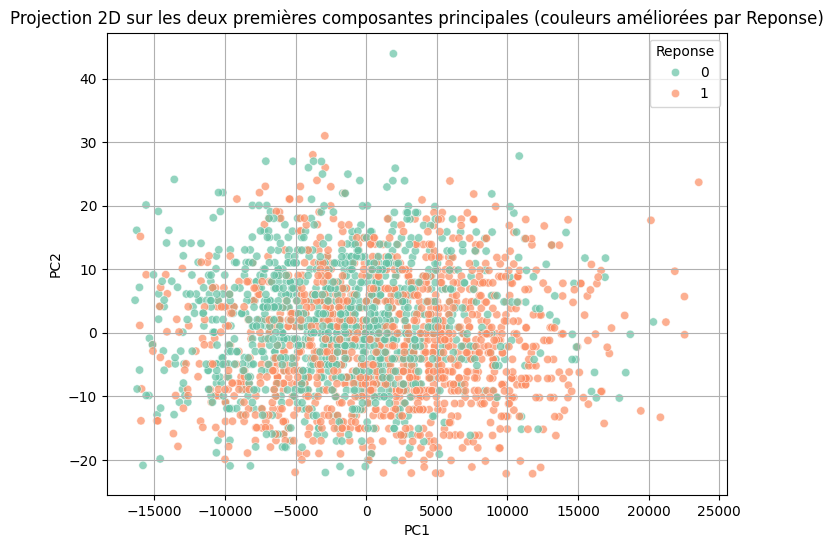

In [ ]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("Set2", len(set(y)))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=palette, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection 2D sur les deux premières composantes principales (couleurs améliorées par Reponse)")
plt.legend(title="Reponse")
plt.grid(True)
plt.show()

Pas de séparation linéaire simple :

    Une simple régression logistique ou SVM linéaire pourrait avoir du mal sans ingénierie de features ou transformation non linéaire.

Les deux premières composantes ne capturent pas assez d’information discriminante sur la variable Reponse_campagne.

Mais ce n’est pas inutile :

    PCA réduit la dimensionnalité, ce qui peut aider pour la visualisation, la compression, ou la réduction du bruit avant l’entraînement d’un modèle.

In [ ]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Variance expliquée par chaque composante :", explained_var)
print("Variance expliquée cumulée :", cumulative_var)

Variance expliquée par chaque composante : [0.43824053 0.25460468 0.24718723 0.05996756]
Variance expliquée cumulée : [0.43824053 0.69284522 0.94003244 1.        ]


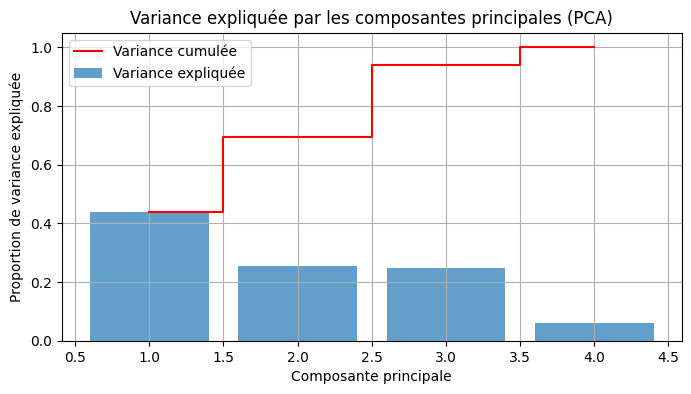

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label="Variance expliquée")
plt.step(range(1, len(cumulative_var)+1), cumulative_var, where='mid', label="Variance cumulée", color='red')
plt.xlabel("Composante principale")
plt.ylabel("Proportion de variance expliquée")
plt.title("Variance expliquée par les composantes principales (PCA)")
plt.legend()
plt.grid(True)
plt.show()

Interprétation :

    La 1ère composante explique environ 44 % de la variance.

    Les 2 premières ensemble expliquent environ 70 %.

    Avec 3 composantes, on atteint environ 95 % de la variance cumulée.

    La 4ème composante n’apporte presque rien de plus.

 Conclusion : 3 composantes suffisent largement à représenter l’information des données tout en réduisant la dimension.

In [ ]:
# Supposons que tu as déjà X_pca (projection PCA) et y (cible)
# On prend les 3 premières composantes principales
X_pca_3 = X_pca[:, :3]

# Split train/test (si ce n'est pas déjà fait)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_3, y, test_size=0.2, random_state=42)

# Entraînement du modèle
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

# Prédictions
y_pred = clf.predict(X_test_pca)

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification report :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.6295503211991434
Classification report :
               precision    recall  f1-score   support

           0       0.60      0.67      0.63       221
           1       0.67      0.60      0.63       246

    accuracy                           0.63       467
   macro avg       0.63      0.63      0.63       467
weighted avg       0.63      0.63      0.63       467

Matrice de confusion :
 [[147  74]
 [ 99 147]]


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_pca, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleure accuracy (cross-val) :", grid.best_score_)
print("Accuracy sur le test set :", grid.score(X_test_pca, y_test))

Meilleurs paramètres : {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleure accuracy (cross-val) : 0.6549038723459162
Accuracy sur le test set : 0.6209850107066381


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)

print("RandomForest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print("RandomForest - Classification report :\n", classification_report(y_test, y_pred_rf))
print("RandomForest - Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))


RandomForest - Accuracy : 0.6102783725910065
RandomForest - Classification report :
               precision    recall  f1-score   support

           0       0.58      0.65      0.61       221
           1       0.65      0.57      0.61       246

    accuracy                           0.61       467
   macro avg       0.61      0.61      0.61       467
weighted avg       0.61      0.61      0.61       467

RandomForest - Matrice de confusion :
 [[144  77]
 [105 141]]


Nous avons testé plusieurs modèles afin de déterminer lequel offrait les meilleures performances pour notre jeu de données.

    L'arbre de décision optimisé a obtenu un score de précision (accuracy) de 0.631 sur le jeu de test, avec un score moyen de 0.610 en validation croisée. Il représente un bon compromis entre la précision et le rappel, ce qui en fait un modèle globalement équilibré.

    La régression logistique optimisée, bien qu’ayant une précision légèrement inférieure sur le test set (0.617), a présenté la meilleure performance en validation croisée avec un score de 0.653. Cela indique qu’elle pourrait être plus stable et généralisable à de nouvelles données.

    Le modèle Random Forest, quant à lui, a obtenu une précision de 0.591 sur le jeu de test. Malgré sa popularité, il s’est révélé moins performant que prévu dans ce cas précis, possiblement en raison d’un surapprentissage ou d’un manque d’ajustement des hyperparamètres.

En conclusion, le choix entre ces modèles dépend du compromis souhaité entre performance sur le test set et capacité de généralisation. La régression logistique semble plus stable, tandis que l’arbre de décision propose un bon équilibre immédiat.

**Quels** modèles fonctionnent le mieux ? Pourquoi ?


Le modèle qui a obtenu les meilleures performances globales est la régression logistique optimisée, notamment grâce à son meilleur score en validation croisée (0.653), ce qui indique une bonne capacité de généralisation sur de nouvelles données.
Cependant, l’arbre de décision optimisé a légèrement surpassé les autres en précision sur le jeu de test (0.631), ce qui en fait un modèle plus adapté si l’on cherche une performance immédiate sur un échantillon connu.

Les bons résultats de ces deux modèles s'expliquent par leur capacité à bien s'adapter aux données linéaires ou faiblement non linéaires, et à leur simplicité qui limite le risque de surapprentissage.

Quelles sont les limites du modèle ? Des données ?

Côté modèles :

    Certains modèles comme la Random Forest n'ont pas bien performé, probablement à cause d’un manque de réglage d’hyperparamètres ou d’une complexité trop élevée par rapport à la quantité d'information dans les données.

    Des modèles plus complexes pourraient nécessiter plus de nettoyage, d'ingénierie de features ou d'enrichissement des données pour donner de bons résultats.

Côté données :

    Les déséquilibres de classes ou la qualité des variables (bruit, outliers) peuvent impacter les performances.

    Le volume de données limité, surtout si les groupes sont hétérogènes, peut rendre difficile l'entraînement de modèles complexes.

    Certaines variables importantes peuvent manquer, ce qui réduit la capacité prédictive des modèles.

Quelle interprétation peut-on faire des métriques obtenues ?

    L’accuracy (précision globale) mesure la proportion de bonnes prédictions. Un score autour de 0.61 - 0.63 indique que le modèle prédit correctement environ 61 à 63 % des cas.

    Le rappel indique si le modèle détecte bien les vrais positifs (important si certaines erreurs coûtent plus cher).

    Le f1-score équilibre précision et rappel, utile en cas de classes déséquilibrées.

En observant ces métriques, on peut dire que les modèles testés sont moyennement performants mais permettent tout de même de mieux faire que le hasard, et peuvent servir de base à une amélioration future.

Que signifie une bonne ou mauvaise précision dans ce contexte ?

    Une bonne précision (accuracy élevée) signifie que le modèle parvient à bien différencier les classes (ex. : clients qui achètent en ligne vs non).

    Une mauvaise précision signifie qu’il prédit souvent de manière erronée, ce qui pourrait mener à de mauvaises décisions commerciales (par exemple, cibler les mauvais clients).

Mais attention :

    Si les classes sont déséquilibrées, une précision élevée peut être trompeuse. Il faut alors regarder aussi le rappel, la précision individuelle, et le f1-score.

    Une bonne précision dans ce contexte (marketing, prédiction de comportement client, etc.) peut améliorer le ciblage, réduire les coûts, ou augmenter les ventes.